In [1]:
%matplotlib inline

In [14]:
from random import choice
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from random import randint
import plotly.io as pio

In [15]:
pio.renderers.default = 'notebook'

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
input_values = [1,2,3,4,5]
squares = [1,4,9,16,25]

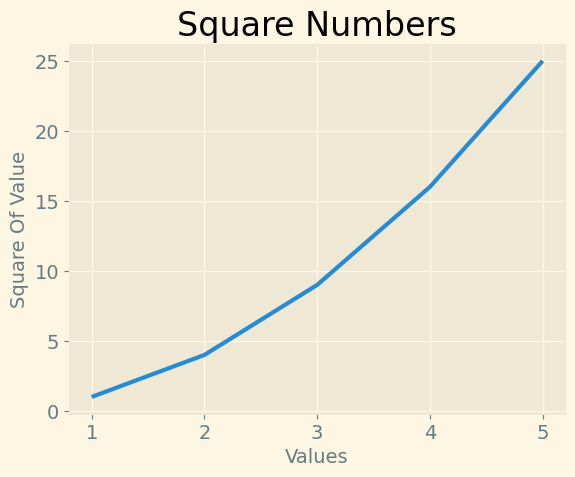

In [5]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(input_values, squares, linewidth = 3)
ax.set_title("Square Numbers", fontsize = 24)
ax.set_xlabel("Values", fontsize = 14)
ax.set_ylabel("Square Of Value", fontsize = 14)
ax.tick_params(labelsize = 14)
plt.show()

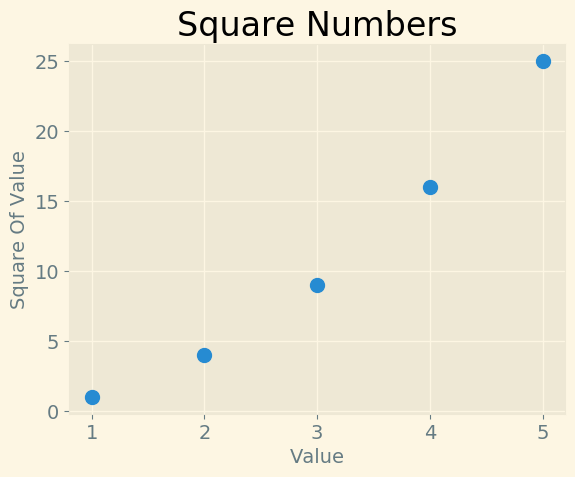

In [6]:
x_values = [1,2,3,4,5]
y_values = [1,4,9,16,25]
plt.style.use('_classic_test_patch')
fig, ax = plt.subplots()
ax.scatter(x_values, y_values, s = 100)
ax.set_title("Square Numbers", fontsize = 24)
ax.set_xlabel("Value", fontsize = 14)
ax.set_ylabel("Square Of Value", fontsize = 14)
ax.tick_params(labelsize = 14)
plt.show()

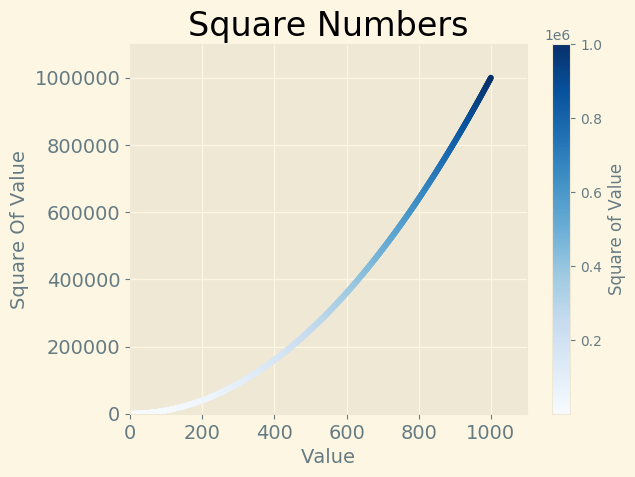

In [7]:
x_values = list(range(1, 1001))
y_values = [x**2 for x in x_values]
norm = Normalize(vmin=min(y_values), vmax=max(y_values))
colors = plt.cm.Blues(norm(y_values))
fig, ax = plt.subplots()
scatter = ax.scatter(x_values, y_values, color=colors, s=10)
sm = ScalarMappable(norm=norm, cmap='Blues')
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Square of Value")
ax.set_title("Square Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Square Of Value", fontsize=14)
ax.tick_params(labelsize=14)
ax.axis([0, 1100, 0, 1_100_000])
ax.ticklabel_format(style='plain')
plt.savefig('squares_plot.png', bbox_inches = 'tight')
plt.show()

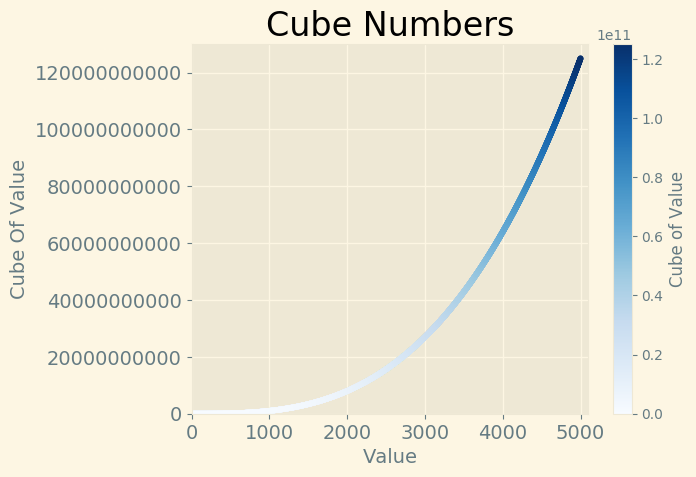

In [8]:
x_values = list(range(1, 5001))
y_values = [x**3 for x in x_values]
norm = Normalize(vmin=min(y_values), vmax=max(y_values))
colors = plt.cm.Blues(norm(y_values))
fig, ax = plt.subplots()
scatter = ax.scatter(x_values, y_values, color=colors, s=10)
sm = ScalarMappable(norm=norm, cmap='Blues')
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Cube of Value")
ax.set_title("Cube Numbers", fontsize=24)
ax.set_xlabel("Value", fontsize=14)
ax.set_ylabel("Cube Of Value", fontsize=14)
ax.tick_params(labelsize=14)
ax.axis([0, 5100, 0, 130_000_000_000])
ax.ticklabel_format(style='plain')
plt.savefig('cubes_plot.png', bbox_inches = 'tight')
plt.show()

In [9]:
class RandomWalk:
    def __init__(self, num_points = 5000):
        self.num_points = num_points
        self.x_values=[0]
        self.y_values=[0]

    def fill_walk(self):
        while len(self.x_values) < self.num_points:
            x_direction = choice([1, -1])
            x_distance = choice([0, 1, 2, 3, 4])
            x_step = x_direction * x_distance
            y_direction = choice([1, -1])
            y_distance = choice([0, 1, 2, 3, 4])
            y_step = y_direction * y_distance
            if x_step == 0 and y_step == 0:
                continue
            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step
            self.x_values.append(x)
            self.y_values.append(y)

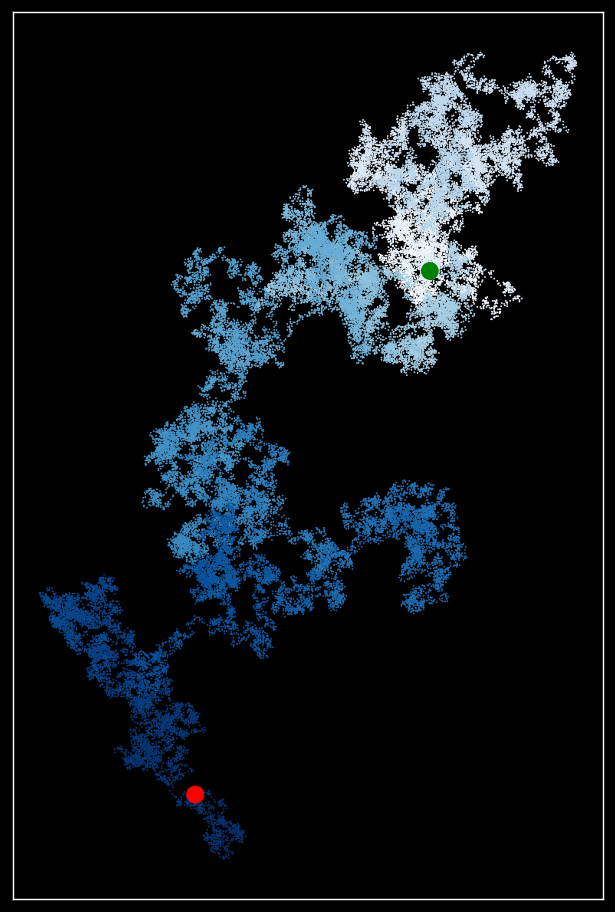

Make Anothder Walk? (Y/N):  n


In [10]:
while True:
    rw = RandomWalk(50_000)
    rw.fill_walk()
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize = (15, 9), dpi = 128)
    point_numbers = range(rw.num_points)
    ax.scatter(rw.x_values, rw.y_values, c = point_numbers, cmap = plt.cm.Blues, edgecolors = 'none', s = 1)
    ax.set_aspect('equal')
    ax.scatter(0, 0, c = 'green', edgecolors = 'none', s = 100)
    ax.scatter(rw.x_values[-1], rw.y_values[-1], c = 'red', edgecolors = 'none', s = 100)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()
    keep_running = input("Make Anothder Walk? (Y/N): ")
    if (keep_running == 'n') or (keep_running == 'N'):
        break

In [11]:
class Die:
    def __init__(self, num_sides = 6):
        self.num_sides = num_sides

    def roll(self):
        return randint(1, self.num_sides)

In [22]:
die_1 = Die()
die_2 = Die(10)
results = []
for roll_num in range(50_000):
    result = die_1.roll() + die_2.roll()
    results.append(result)

frequencies = []
max_results = die_1.num_sides + die_2.num_sides
poss_results = range(2, max_results + 1)
for value in poss_results:
    frequency = results.count(value)
    frequencies.append(frequency)

print(frequencies)

[792, 1637, 2520, 3247, 4128, 5079, 5142, 5021, 4962, 5037, 4180, 3313, 2489, 1650, 803]


In [25]:
title = "Results Of Rolling A D6 And A D10 50,000 Times"
labels = {'x' : 'Result', 'y': 'Frequency Of Result'}
fig = px.bar(x = poss_results, y = frequencies, title = title, labels = labels)
fig.update_layout(xaxis_dtick = 1)
fig.write_html('dice_visual_d6d10.html')
fig.show()